### 1. Imports

In [24]:
import os

import librosa
import librosa.display
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import torchaudio
import audioread
import ffmpeg

#tf.compat.v1.enable_eager_execution()
import matplotlib.pyplot as plt 
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

import numpy as np
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import torch
from torchsummary import summary

import keras as k
from keras.models import Sequential

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [25]:
df = pd.read_csv('Data/features_3_sec.csv')

In [26]:
df = df.drop(labels='filename', axis=1)

In [27]:
class_list = df.iloc[:, -1]
convertor = LabelEncoder()

In [28]:
y = convertor.fit_transform(class_list)

### 2. Train/Test Data splitting

In [29]:
fit = StandardScaler()
X = fit.fit_transform(np.array(df.iloc[:, :-1], dtype=float))

In [30]:
#Model 1 splitting
X_old = X[1:9990]
y_old = y[1:9990] 
X_train, X_test, y_train, y_test = train_test_split(X_old, y_old, test_size=0.33)

print("There are ",X_train.shape[0]," samples in the training set")
print("There are ",X_test.shape[0]," samples in the testing set")

(6692, 58)
(6692,)
(3297, 58)
(3297,)


In [31]:
#Model 2 spliting
from sklearn.utils import shuffle

X_train_2, y_train_2 = shuffle(X[1:9990], y[1:9990])
X_test_2, y_test_2 = shuffle(X[9991:10989], y[9991:10989])

print("There are ",X_train_2.shape[0]," samples in the training set")
print("There are ",X_test_2.shape[0]," samples in the testing set")

(9989, 58)
(9989,)
(998, 58)
(998,)


In [32]:
#Model 3 splitting
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.33)

print("There are ",X_train_3.shape[0]," samples in the training set")
print("There are ",X_test_3.shape[0]," samples in the testing set")

(7370, 58)
(7370,)
(3631, 58)
(3631,)


## 3. Neural Network Architecture

In [54]:
def train_model(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer=optimizer,
                 loss='sparse_categorical_crossentropy',
                 metrics='accuracy'
    )
    return model.fit(X_train_3, y_train_3, validation_data=(X_test_3, y_test_3), epochs=epochs, batch_size=batch_size)

In [55]:
model = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train_3.shape[1],)),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(10, activation='softmax')  
])
print(model.summary())
model_history = train_model(model=model, epochs=600, optimizer='adam')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               30208     
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)               

58/58 [==============================] - 1s 10ms/step - loss: 0.0804 - accuracy: 0.9741 - val_loss: 0.4257 - val_accuracy: 0.8953
Epoch 48/600
58/58 [==============================] - 1s 9ms/step - loss: 0.0819 - accuracy: 0.9727 - val_loss: 0.4273 - val_accuracy: 0.9000
Epoch 49/600
58/58 [==============================] - 1s 11ms/step - loss: 0.0723 - accuracy: 0.9760 - val_loss: 0.4015 - val_accuracy: 0.9055
Epoch 50/600
58/58 [==============================] - 1s 11ms/step - loss: 0.0838 - accuracy: 0.9737 - val_loss: 0.4294 - val_accuracy: 0.8937
Epoch 51/600
58/58 [==============================] - 1s 10ms/step - loss: 0.0920 - accuracy: 0.9701 - val_loss: 0.4132 - val_accuracy: 0.8984
Epoch 52/600
58/58 [==============================] - 1s 10ms/step - loss: 0.0831 - accuracy: 0.9742 - val_loss: 0.4259 - val_accuracy: 0.8973
Epoch 53/600
58/58 [==============================] - 1s 9ms/step - loss: 0.0627 - accuracy: 0.9799 - val_loss: 0.4352 - val_accuracy: 0.8995
Epoch 54/600
5

Epoch 105/600
58/58 [==============================] - 0s 8ms/step - loss: 0.0365 - accuracy: 0.9890 - val_loss: 0.5073 - val_accuracy: 0.8967
Epoch 106/600
58/58 [==============================] - 1s 9ms/step - loss: 0.0403 - accuracy: 0.9879 - val_loss: 0.4705 - val_accuracy: 0.9022
Epoch 107/600
58/58 [==============================] - 1s 9ms/step - loss: 0.0519 - accuracy: 0.9859 - val_loss: 0.4581 - val_accuracy: 0.9020
Epoch 108/600
58/58 [==============================] - 1s 9ms/step - loss: 0.0565 - accuracy: 0.9814 - val_loss: 0.4666 - val_accuracy: 0.9028
Epoch 109/600
58/58 [==============================] - 1s 9ms/step - loss: 0.0480 - accuracy: 0.9845 - val_loss: 0.4395 - val_accuracy: 0.9047
Epoch 110/600
58/58 [==============================] - 1s 10ms/step - loss: 0.0335 - accuracy: 0.9896 - val_loss: 0.4574 - val_accuracy: 0.9053
Epoch 111/600
58/58 [==============================] - 0s 9ms/step - loss: 0.0390 - accuracy: 0.9889 - val_loss: 0.4426 - val_accuracy: 0.905

58/58 [==============================] - 1s 12ms/step - loss: 0.0320 - accuracy: 0.9902 - val_loss: 0.4627 - val_accuracy: 0.9072
Epoch 163/600
58/58 [==============================] - 1s 9ms/step - loss: 0.0328 - accuracy: 0.9905 - val_loss: 0.4461 - val_accuracy: 0.9110
Epoch 164/600
58/58 [==============================] - 1s 14ms/step - loss: 0.0333 - accuracy: 0.9901 - val_loss: 0.4480 - val_accuracy: 0.9050
Epoch 165/600
58/58 [==============================] - 1s 10ms/step - loss: 0.0244 - accuracy: 0.9912 - val_loss: 0.4856 - val_accuracy: 0.9091
Epoch 166/600
58/58 [==============================] - 1s 10ms/step - loss: 0.0310 - accuracy: 0.9924 - val_loss: 0.4787 - val_accuracy: 0.9135
Epoch 167/600
58/58 [==============================] - 1s 9ms/step - loss: 0.0299 - accuracy: 0.9909 - val_loss: 0.4818 - val_accuracy: 0.9064
Epoch 168/600
58/58 [==============================] - 1s 10ms/step - loss: 0.0260 - accuracy: 0.9929 - val_loss: 0.5048 - val_accuracy: 0.9050
Epoch 16

58/58 [==============================] - 1s 9ms/step - loss: 0.0242 - accuracy: 0.9917 - val_loss: 0.5093 - val_accuracy: 0.9066
Epoch 220/600
58/58 [==============================] - 1s 10ms/step - loss: 0.0222 - accuracy: 0.9920 - val_loss: 0.5071 - val_accuracy: 0.9050
Epoch 221/600
58/58 [==============================] - 1s 11ms/step - loss: 0.0249 - accuracy: 0.9920 - val_loss: 0.5317 - val_accuracy: 0.9053
Epoch 222/600
58/58 [==============================] - 1s 16ms/step - loss: 0.0234 - accuracy: 0.9932 - val_loss: 0.5153 - val_accuracy: 0.9097
Epoch 223/600
58/58 [==============================] - 1s 11ms/step - loss: 0.0209 - accuracy: 0.9932 - val_loss: 0.5059 - val_accuracy: 0.9058
Epoch 224/600
58/58 [==============================] - 1s 11ms/step - loss: 0.0254 - accuracy: 0.9923 - val_loss: 0.4944 - val_accuracy: 0.9097
Epoch 225/600
58/58 [==============================] - 1s 9ms/step - loss: 0.0179 - accuracy: 0.9947 - val_loss: 0.5074 - val_accuracy: 0.9124
Epoch 22

58/58 [==============================] - 1s 12ms/step - loss: 0.0200 - accuracy: 0.9935 - val_loss: 0.4892 - val_accuracy: 0.9135
Epoch 277/600
58/58 [==============================] - 1s 12ms/step - loss: 0.0141 - accuracy: 0.9955 - val_loss: 0.4866 - val_accuracy: 0.9155
Epoch 278/600
58/58 [==============================] - 1s 12ms/step - loss: 0.0220 - accuracy: 0.9935 - val_loss: 0.5201 - val_accuracy: 0.9108
Epoch 279/600
58/58 [==============================] - 1s 13ms/step - loss: 0.0185 - accuracy: 0.9943 - val_loss: 0.5356 - val_accuracy: 0.9083
Epoch 280/600
58/58 [==============================] - 1s 10ms/step - loss: 0.0156 - accuracy: 0.9957 - val_loss: 0.5211 - val_accuracy: 0.9124
Epoch 281/600
58/58 [==============================] - 1s 9ms/step - loss: 0.0162 - accuracy: 0.9951 - val_loss: 0.5193 - val_accuracy: 0.9102
Epoch 282/600
58/58 [==============================] - 1s 10ms/step - loss: 0.0265 - accuracy: 0.9915 - val_loss: 0.5375 - val_accuracy: 0.9108
Epoch 2

58/58 [==============================] - 0s 8ms/step - loss: 0.0186 - accuracy: 0.9955 - val_loss: 0.5574 - val_accuracy: 0.9069
Epoch 334/600
58/58 [==============================] - 0s 8ms/step - loss: 0.0183 - accuracy: 0.9944 - val_loss: 0.5196 - val_accuracy: 0.9108
Epoch 335/600
58/58 [==============================] - 0s 8ms/step - loss: 0.0123 - accuracy: 0.9959 - val_loss: 0.5831 - val_accuracy: 0.9077
Epoch 336/600
58/58 [==============================] - 1s 9ms/step - loss: 0.0132 - accuracy: 0.9954 - val_loss: 0.5937 - val_accuracy: 0.9066
Epoch 337/600
58/58 [==============================] - 0s 8ms/step - loss: 0.0127 - accuracy: 0.9963 - val_loss: 0.6170 - val_accuracy: 0.9031
Epoch 338/600
58/58 [==============================] - 0s 8ms/step - loss: 0.0183 - accuracy: 0.9944 - val_loss: 0.5723 - val_accuracy: 0.9064
Epoch 339/600
58/58 [==============================] - 0s 8ms/step - loss: 0.0152 - accuracy: 0.9953 - val_loss: 0.5589 - val_accuracy: 0.9097
Epoch 340/600

58/58 [==============================] - 0s 9ms/step - loss: 0.0147 - accuracy: 0.9957 - val_loss: 0.6398 - val_accuracy: 0.9000
Epoch 391/600
58/58 [==============================] - 0s 9ms/step - loss: 0.0129 - accuracy: 0.9958 - val_loss: 0.5890 - val_accuracy: 0.9105
Epoch 392/600
58/58 [==============================] - 1s 9ms/step - loss: 0.0117 - accuracy: 0.9963 - val_loss: 0.6193 - val_accuracy: 0.9075
Epoch 393/600
58/58 [==============================] - 1s 10ms/step - loss: 0.0167 - accuracy: 0.9951 - val_loss: 0.5693 - val_accuracy: 0.9102
Epoch 394/600
58/58 [==============================] - 1s 9ms/step - loss: 0.0159 - accuracy: 0.9948 - val_loss: 0.5773 - val_accuracy: 0.9042
Epoch 395/600
58/58 [==============================] - 1s 9ms/step - loss: 0.0112 - accuracy: 0.9969 - val_loss: 0.5803 - val_accuracy: 0.9083
Epoch 396/600
58/58 [==============================] - 0s 8ms/step - loss: 0.0206 - accuracy: 0.9939 - val_loss: 0.5841 - val_accuracy: 0.9064
Epoch 397/60

58/58 [==============================] - 1s 14ms/step - loss: 0.0136 - accuracy: 0.9954 - val_loss: 0.5451 - val_accuracy: 0.9132
Epoch 448/600
58/58 [==============================] - 1s 11ms/step - loss: 0.0135 - accuracy: 0.9958 - val_loss: 0.5680 - val_accuracy: 0.9119
Epoch 449/600
58/58 [==============================] - 1s 9ms/step - loss: 0.0112 - accuracy: 0.9959 - val_loss: 0.5768 - val_accuracy: 0.9116
Epoch 450/600
58/58 [==============================] - 1s 9ms/step - loss: 0.0142 - accuracy: 0.9950 - val_loss: 0.5859 - val_accuracy: 0.9141
Epoch 451/600
58/58 [==============================] - 1s 10ms/step - loss: 0.0212 - accuracy: 0.9931 - val_loss: 0.5790 - val_accuracy: 0.9119
Epoch 452/600
58/58 [==============================] - 1s 10ms/step - loss: 0.0236 - accuracy: 0.9943 - val_loss: 0.5850 - val_accuracy: 0.9072
Epoch 453/600
58/58 [==============================] - 1s 10ms/step - loss: 0.0173 - accuracy: 0.9947 - val_loss: 0.5587 - val_accuracy: 0.9127
Epoch 45

58/58 [==============================] - 1s 9ms/step - loss: 0.0103 - accuracy: 0.9972 - val_loss: 0.6333 - val_accuracy: 0.9163
Epoch 505/600
58/58 [==============================] - 1s 9ms/step - loss: 0.0094 - accuracy: 0.9962 - val_loss: 0.6351 - val_accuracy: 0.9182
Epoch 506/600
58/58 [==============================] - 1s 9ms/step - loss: 0.0135 - accuracy: 0.9959 - val_loss: 0.6422 - val_accuracy: 0.9160
Epoch 507/600
58/58 [==============================] - 1s 9ms/step - loss: 0.0184 - accuracy: 0.9954 - val_loss: 0.6642 - val_accuracy: 0.9119
Epoch 508/600
58/58 [==============================] - 0s 8ms/step - loss: 0.0136 - accuracy: 0.9961 - val_loss: 0.6466 - val_accuracy: 0.9138
Epoch 509/600
58/58 [==============================] - 0s 8ms/step - loss: 0.0178 - accuracy: 0.9946 - val_loss: 0.5612 - val_accuracy: 0.9143
Epoch 510/600
58/58 [==============================] - 0s 8ms/step - loss: 0.0162 - accuracy: 0.9951 - val_loss: 0.5966 - val_accuracy: 0.9152
Epoch 511/600

58/58 [==============================] - 0s 8ms/step - loss: 0.0143 - accuracy: 0.9962 - val_loss: 0.6239 - val_accuracy: 0.9130
Epoch 562/600
58/58 [==============================] - 0s 8ms/step - loss: 0.0131 - accuracy: 0.9965 - val_loss: 0.6172 - val_accuracy: 0.9135
Epoch 563/600
58/58 [==============================] - 0s 8ms/step - loss: 0.0098 - accuracy: 0.9966 - val_loss: 0.6215 - val_accuracy: 0.9113
Epoch 564/600
58/58 [==============================] - 0s 8ms/step - loss: 0.0085 - accuracy: 0.9970 - val_loss: 0.6267 - val_accuracy: 0.9130
Epoch 565/600
58/58 [==============================] - 0s 8ms/step - loss: 0.0120 - accuracy: 0.9967 - val_loss: 0.6378 - val_accuracy: 0.9113
Epoch 566/600
58/58 [==============================] - 0s 8ms/step - loss: 0.0135 - accuracy: 0.9954 - val_loss: 0.6547 - val_accuracy: 0.9124
Epoch 567/600
58/58 [==============================] - 0s 8ms/step - loss: 0.0189 - accuracy: 0.9946 - val_loss: 0.5838 - val_accuracy: 0.9149
Epoch 568/600

## 4. Quantitative analysis

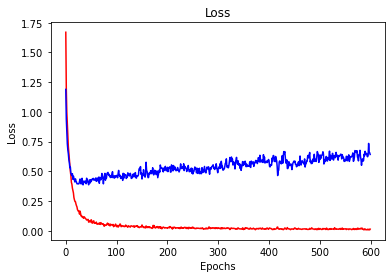

In [56]:
#Here : Plot loss function and accuracy
plt.title('Loss')
plt.plot(model_history.history['loss'], 'r')
plt.plot(model_history.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

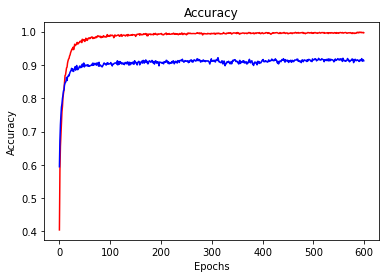

In [57]:
plt.title('Accuracy')
plt.plot(model_history.history['accuracy'], 'r')
plt.plot(model_history.history['val_accuracy'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [58]:
#Save model
model.save('Data/models/model3')

INFO:tensorflow:Assets written to: Data/models/model3\assets


## 5. Qualitative analysis (per model)

In [59]:
#Test the accuracy of a model on batch of size testing_batch_size
def test_batch_accuracy(model, X_test_set, y_test_set, testing_batch_size=16):
    ind = random.randint(1, X_test_set.shape[0] - testing_batch_size + 1)

    outputs = model(X_test_set[ind:ind+testing_batch_size])
    groundtruth = y_test_set[ind:ind+testing_batch_size]

    predicted_labels = []
    for i in range(len(outputs)):
        max_value = 0
        for j in range(len(outputs[0])):
            if outputs[i][j] > max_value:
                max_value = outputs[i][j]
                index = j
        predicted_labels.append(index)

    print("Groundtruth : ", groundtruth)
    print("Predicted labels : ", predicted_labels) 

    classes = ('blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock')

    print('GroundTruth: ', ' '.join(f'{classes[groundtruth[j]]:5s}' for j in range(testing_batch_size)))
    print('Predicted: ', ' '.join(f'{classes[predicted_labels[j]]:5s}'
                                  for j in range(testing_batch_size)))

In [60]:
import keras

In [61]:
#Accuracy of model1
model1 = keras.models.load_model('Data/models/model1')
print("Prediction on an old data batch")
test_batch_accuracy(model1, X_test, y_test)
print("Prediction on a new data batch")
test_batch_accuracy(model1, X_test_2, y_test_2)

Prediction on an old data batch
Groundtruth :  [5 4 6 9 9 2 7 3 2 0 7 9 2 7 6 2]
Predicted labels :  [1, 4, 6, 9, 9, 2, 7, 3, 2, 0, 7, 9, 2, 7, 6, 2]
GroundTruth:  jazz  hiphop metal rock  rock  country pop   disco country blues pop   rock  country pop   metal country
Predicted:  classical hiphop metal rock  rock  country pop   disco country blues pop   rock  country pop   metal country
Prediction on a new data batch
Groundtruth :  [8 5 3 6 3 2 9 9 5 5 6 2 3 0 7 6]
Predicted labels :  [8, 5, 4, 3, 2, 2, 7, 7, 2, 2, 6, 2, 4, 7, 4, 6]
GroundTruth:  reggae jazz  disco metal disco country rock  rock  jazz  jazz  metal country disco blues pop   metal
Predicted:  reggae jazz  hiphop disco country country pop   pop   country country metal country hiphop pop   hiphop metal


In [62]:
#Accuracy of model2
model2 = keras.models.load_model('Data/models/model2')
print("Prediction on an old data batch")
test_batch_accuracy(model2, X_test, y_test)
print("Prediction on a new data batch")
test_batch_accuracy(model2, X_test_2, y_test_2)

Prediction on an old data batch
Groundtruth :  [5 3 9 0 5 6 8 4 4 2 8 3 4 6 6 8]
Predicted labels :  [5, 3, 9, 0, 5, 6, 8, 4, 4, 2, 8, 3, 4, 6, 6, 8]
GroundTruth:  jazz  disco rock  blues jazz  metal reggae hiphop hiphop country reggae disco hiphop metal metal reggae
Predicted:  jazz  disco rock  blues jazz  metal reggae hiphop hiphop country reggae disco hiphop metal metal reggae
Prediction on a new data batch
Groundtruth :  [7 3 7 7 1 5 5 8 7 2 5 2 9 4 3 1]
Predicted labels :  [4, 3, 7, 4, 1, 3, 2, 7, 4, 2, 1, 5, 3, 8, 4, 5]
GroundTruth:  pop   disco pop   pop   classical jazz  jazz  reggae pop   country jazz  country rock  hiphop disco classical
Predicted:  hiphop disco pop   hiphop classical disco country pop   hiphop country classical jazz  disco reggae hiphop jazz 


In [63]:
#Accuracy of model3
model3 = keras.models.load_model('Data/models/model3')
print("Prediction on an old data batch")
test_batch_accuracy(model3, X_test, y_test)
print("Prediction on a new data batch")
test_batch_accuracy(model3, X_test_2, y_test_2)

Prediction on an old data batch
Groundtruth :  [7 4 3 3 3 8 1 8 7 2 3 8 1 9 4 1]
Predicted labels :  [7, 4, 3, 3, 3, 8, 1, 8, 7, 2, 3, 8, 1, 9, 4, 1]
GroundTruth:  pop   hiphop disco disco disco reggae classical reggae pop   country disco reggae classical rock  hiphop classical
Predicted:  pop   hiphop disco disco disco reggae classical reggae pop   country disco reggae classical rock  hiphop classical
Prediction on a new data batch
Groundtruth :  [0 2 7 1 8 6 7 3 2 3 8 0 8 4 5 9]
Predicted labels :  [0, 2, 7, 1, 8, 6, 7, 3, 2, 3, 8, 0, 8, 1, 5, 9]
GroundTruth:  blues country pop   classical reggae metal pop   disco country disco reggae blues reggae hiphop jazz  rock 
Predicted:  blues country pop   classical reggae metal pop   disco country disco reggae blues reggae classical jazz  rock 


## 6. Data expansion script (add new songs to the dataset)

In [14]:
#Save the download file as a 30 second wav file in the given path
def save_30_seconds(download_path, music_name, save_path, i):
    song, sr = librosa.load(download_path)

    #Cut the song to a 30 second sample
    #400000 + 22050*30 = 1061500 
    song = song[400000:1061500]

    #Save it in the appropriate folder
    scipy.io.wavfile.write(os.path.join(save_path,music_name), sr, song)

In [15]:
#Returns a 3 seconds song mini-sample (3 seconds are selected based on index)
def get_3_seconds(song, index):
    song_minisample = song[index*66149:(index+1)*66149]
    return song_minisample

In [16]:
#Compute and returns a list containing all the selected features of a song.
def compute_features(song, song_name, song_label, index):
    filename = song_name+'.'+str(index)+'.wav'
    length = 66149
    chroma_stft_mean = np.mean(librosa.feature.chroma_stft(song))
    chroma_stft_var = np.var(librosa.feature.chroma_stft(song))
    rms_mean = np.mean(librosa.feature.rms(song))
    rms_var = np.var(librosa.feature.rms(song))
    spectral_centroid_mean = np.mean(librosa.feature.spectral_centroid(song))
    spectral_centroid_var = np.var(librosa.feature.spectral_centroid(song))
    spectral_bandwidth_mean = np.mean(librosa.feature.spectral_bandwidth(song))
    spectral_bandwidth_var = np.var(librosa.feature.spectral_bandwidth(song))
    rolloff_mean = np.mean(librosa.feature.spectral_rolloff(song))
    rolloff_var = np.var(librosa.feature.spectral_rolloff(song))
    zero_crossing_rate_mean = np.mean(librosa.feature.zero_crossing_rate(song))
    zero_crossing_rate_var = np.var(librosa.feature.zero_crossing_rate(song))
    y_harm, y_perc = librosa.effects.hpss(song)
    harmony_mean = np.mean(y_harm) 
    harmony_var = np.var(y_harm)
    perceptr_mean = np.mean(y_perc)
    perceptr_var = np.var(y_perc)
    tempo, _ = librosa.beat.beat_track(song, sr=22050)
    # 20 fois les 2
    mfcc = librosa.feature.mfcc(song)
    mfcc_mean_list = []
    mfcc_var_list = []
    for i in range(20):
        mfcc_mean = np.mean(mfcc[i])
        mfcc_var = np.var(mfcc[i])
        mfcc_mean_list.append(mfcc_mean)
        mfcc_var_list.append(mfcc_var)
    label = song_label
    csv_line = list((filename, length, chroma_stft_mean, chroma_stft_var, rms_mean, rms_var, spectral_centroid_mean, spectral_centroid_var, spectral_bandwidth_mean, spectral_bandwidth_var, rolloff_mean, rolloff_var, zero_crossing_rate_mean, zero_crossing_rate_var, harmony_mean, harmony_var, perceptr_mean, perceptr_var, tempo))
    for i in range(20):
        csv_line.append(mfcc_mean_list[i])
        csv_line.append(mfcc_var_list[i])
    csv_line.append(label)
    return csv_line

In [17]:
#Add an entry to the csv features file.
def add_line_to_csv(entry):
    csv_path = 'Data/features_3_sec.csv'
    with open(csv_path, 'a', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)

        # write the entry
        writer.writerow(entry)

        f.close()

In [18]:
#Add the 10 sets of computed features of a 30-second song to the csv features file
def add_features_to_csv(song, song_name, label):
    #Loop to get 3 seconds and for each 3 seconds compute features
    #At the end of each loop, build a line of the csv file
    for i in range(10):
        three_sec = get_3_seconds(song, i)
        csv_line = compute_features(three_sec, song_name, label, i)
        add_line_to_csv(csv_line)
    print("Successfully added song features to data csv")

### Add songs to the dataset

In [19]:
import scipy
from scipy.io.wavfile import write
import statistics
import csv

In [20]:
#Add a song to the dataset.
def add_song(path, name, i):
    music_name = name
    download_path = path+music_name

    music_no_wav = music_name.split(".")
    music_no_wav = music_no_wav[0]

    #Here : change i to have the good index in classes
    classes = ('blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock')
    music_class = classes[i]

    save_path = 'Data/genres_original/'+music_class

    print("Downloaded file", music_name, "at : " ,download_path)
    print("Saved 30 sec sample at : " , save_path)

    save_30_seconds(download_path, music_name, save_path, i)

    song, sr = librosa.load(save_path+'/'+music_name)

    add_features_to_csv(song, music_no_wav, music_class)
    

In [23]:
#Loop through all the files of a genre folder and add them to the dataset
path = 'Data/recents/rock/'

#the value of i depends on which genre folder we are looping on
#(0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock')
i = 9

for fn in os.listdir(path):
    add_song(path, fn, i)
    print("Song added")


Downloaded file AC_DC - Shot In The Dark (Official Audio).wav at :  Data/recents/rock/AC_DC - Shot In The Dark (Official Audio).wav
Saved 30 sec sample at :  Data/genres_original/rock
Successfully added song features to data csv
Song added
Downloaded file Anthony Green - 'Don't Dance' (Official Video).wav at :  Data/recents/rock/Anthony Green - 'Don't Dance' (Official Video).wav
Saved 30 sec sample at :  Data/genres_original/rock
Successfully added song features to data csv
Song added
Downloaded file Cult to Follow Leave It All Behind You Lyrics.wav at :  Data/recents/rock/Cult to Follow Leave It All Behind You Lyrics.wav
Saved 30 sec sample at :  Data/genres_original/rock
Successfully added song features to data csv
Song added
Downloaded file Royal Blood - Trouble's Coming (Official Audio).wav at :  Data/recents/rock/Royal Blood - Trouble's Coming (Official Audio).wav
Saved 30 sec sample at :  Data/genres_original/rock
Successfully added song features to data csv
Song added
Downloaded